# Predicting Hospital Readmissions: EDA

## Introduction

Predictive modeling plays a crucial role in healthcare analytics, providing insights into patient outcomes and allowing for proactive interventions. In this Jupyter Notebook, we delve into the Exploratory Data Analysis (EDA) phase of a predictive modeling project, focusing on patient readmission rates.


## Background


Hospital readmissions pose significant challenges for healthcare providers and contribute to increased healthcare costs. Understanding the factors influencing readmission rates can lead to the development of predictive models that aid in identifying high-risk patients and implementing targeted interventions.



## Objective


The primary objective of this analysis is to perform a comprehensive EDA on the dataset related to patient admissions and readmissions. Through visualizations, statistical summaries, and data exploration techniques, we aim to:

- Identify Patterns: Explore patterns and trends in patient data, considering variables such as age, medical history, and initial admission details.

- Feature Importance: Assess the importance of various features in predicting readmission rates. This step is crucial for feature selection in the modeling phase.

- Correlation Analysis: Examine the correlations between different variables to uncover potential relationships that may influence readmission outcomes.



## Dataset


The dataset used for this analysis contains anonymized patient records, including demographic information, medical history, admission details, and readmission status. It is essential to preprocess and clean the data before conducting the EDA to ensure the accuracy and reliability of the insights gained.

## Tools and Libraries
We will leverage popular Python libraries, including NumPy, Pandas, Matplotlib, and Seaborn, to conduct our EDA. These tools provide a robust environment for data manipulation, visualization, and statistical analysis.

Now, let's dive into the data and begin our exploration!

### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Import CSV file

In [4]:
df = pd.read_csv('hospital_readmissions.csv')

### Detail Exploration

In [5]:
df.head(10)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
7,[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
8,[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes
9,[70-80),8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no


Information in the file

- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

The target variable of this dataset is "readmitted"


In [6]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [7]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [8]:
df.set_index('age', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, [70-80) to [50-60)
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   time_in_hospital   25000 non-null  int64 
 1   n_lab_procedures   25000 non-null  int64 
 2   n_procedures       25000 non-null  int64 
 3   n_medications      25000 non-null  int64 
 4   n_outpatient       25000 non-null  int64 
 5   n_inpatient        25000 non-null  int64 
 6   n_emergency        25000 non-null  int64 
 7   medical_specialty  25000 non-null  object
 8   diag_1             25000 non-null  object
 9   diag_2             25000 non-null  object
 10  diag_3             25000 non-null  object
 11  glucose_test       25000 non-null  object
 12  A1Ctest            25000 non-null  object
 13  change             25000 non-null  object
 14  diabetes_med       25000 non-null  object
 15  readmitted         25000 non-null  object
dtypes: int64(7), object(9)
memory usage: 

No missing variables detected, no action needed.

### Univariate Analysis

Setting up variables:

In [18]:
Quantitative_Values = df.select_dtypes(include=['int64', 'float64'])
Categorical_Values = df.select_dtypes(include=['object'])

#### Quantitative Values

Filtering Outliers:

In [22]:
Q1 = Quantitative_Values.quantile(0.25)
Q3 = Quantitative_Values.quantile(0.75)
IQR = Q3 - Q1

In [23]:
df = df[~((Quantitative_Values < Q1 - 1.5 * IQR) | (Quantitative_Values > Q3 + 1.5 * IQR))]

##### Viewing Univariate Relationships

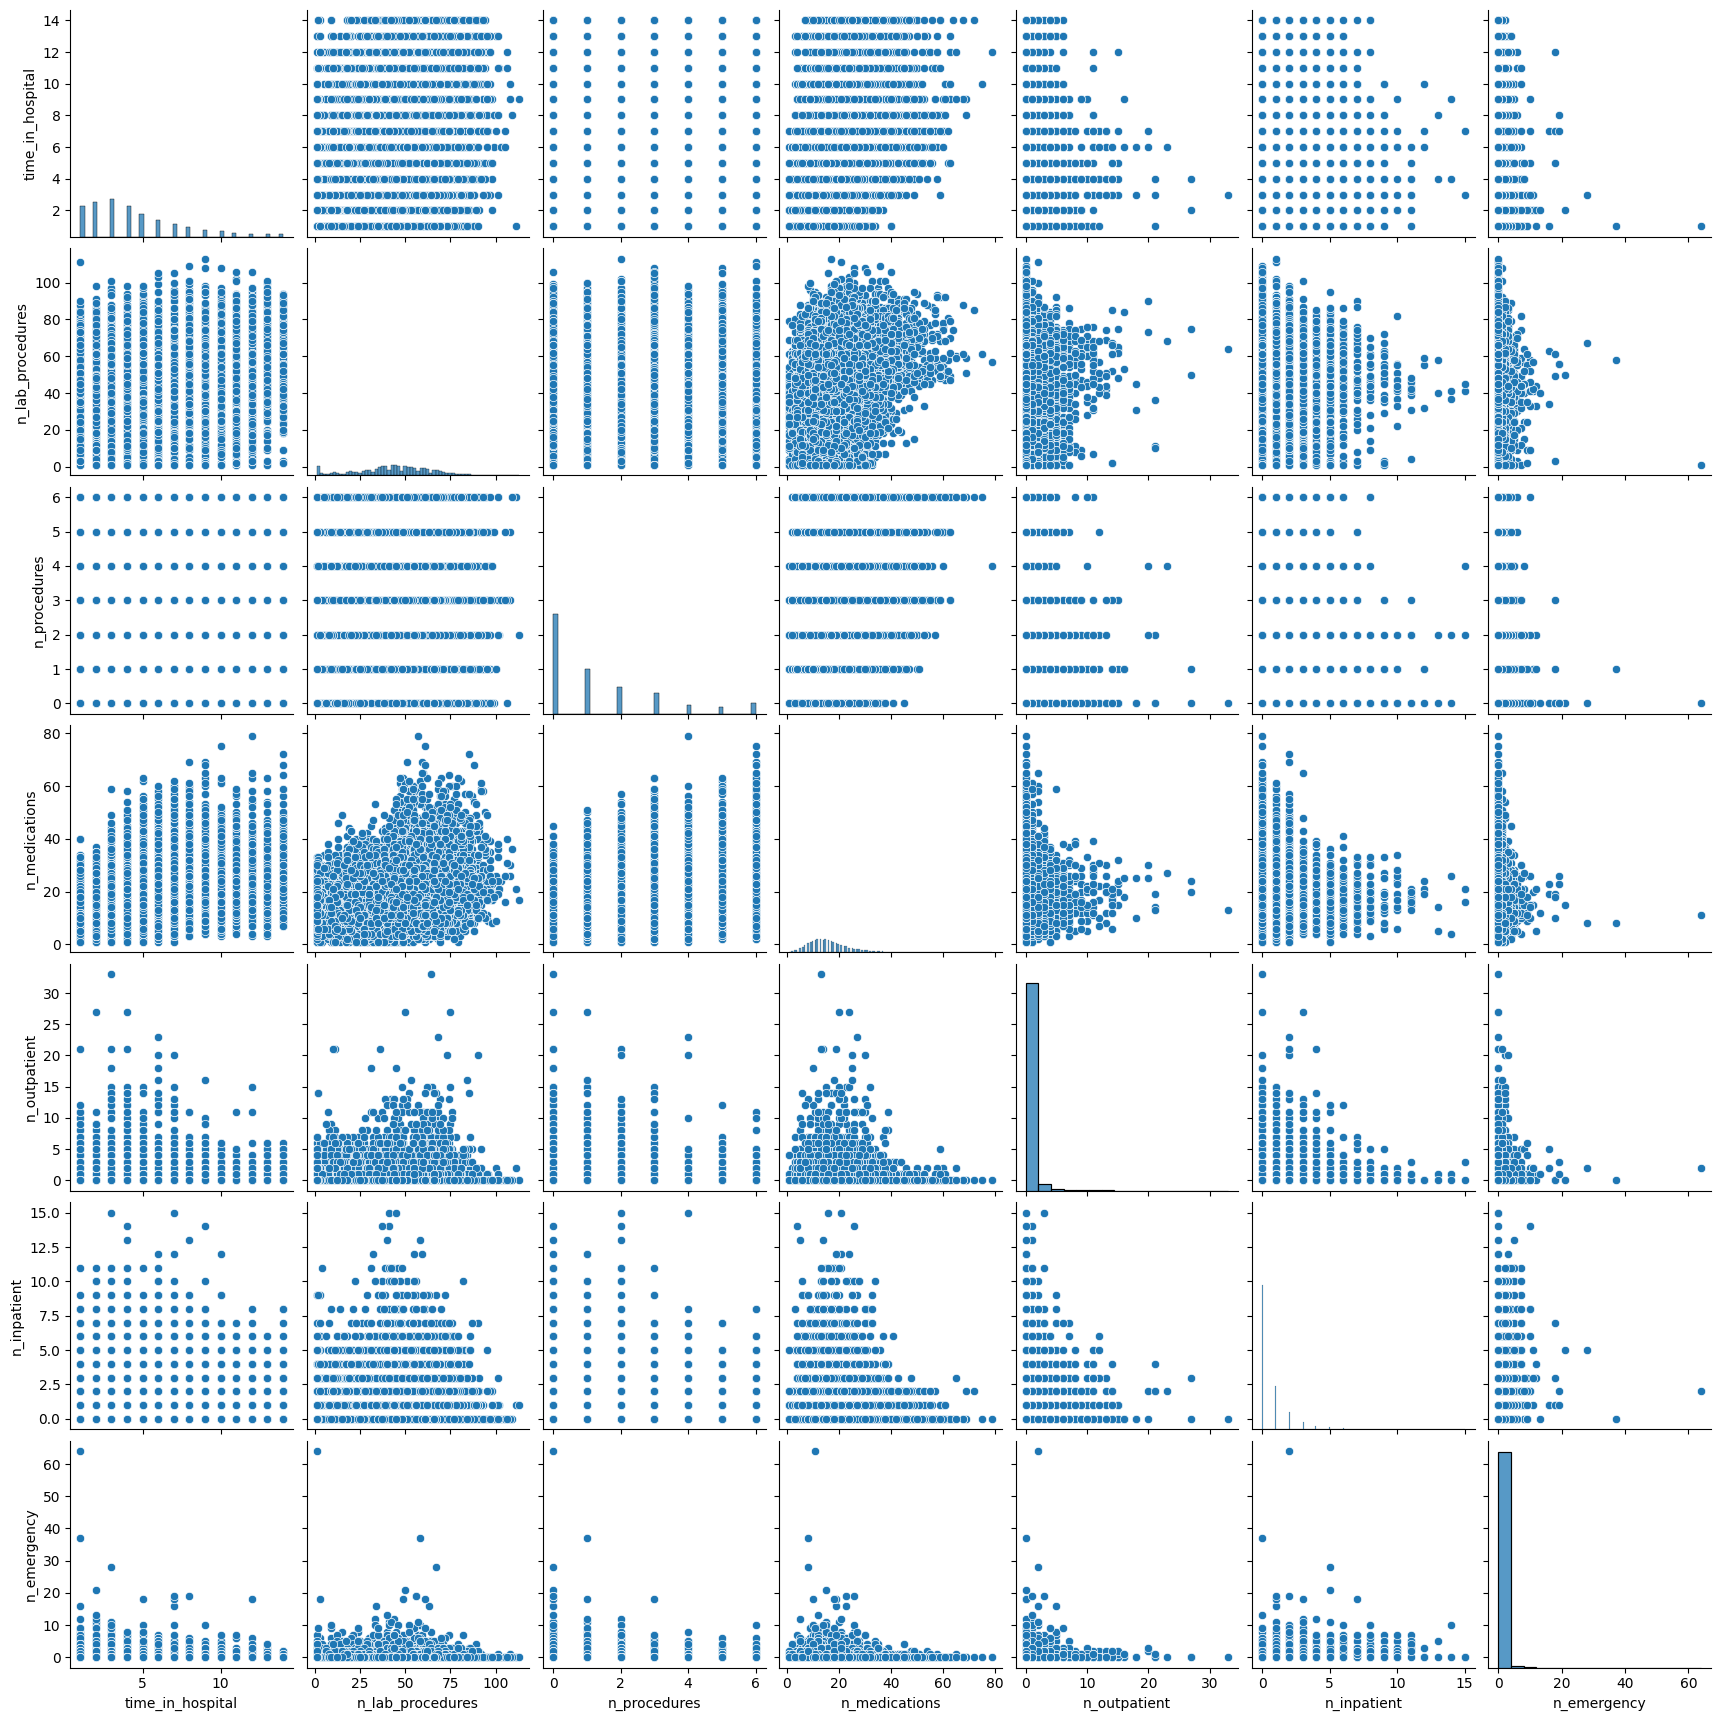

In [27]:
sns.pairplot(Quantitative_Values)

#### Categorical Values

Checking for and dropping duplicates:

In [28]:
df.drop_duplicates(inplace=True)